# Heart Attack prediction

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /Users/yourus_m/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


# 1. Importing file

In [2]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/Users/yourus_m/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1/Heart.csv')

In [3]:
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

1. Cleveland: 303 observations,
2. Hungarian: 294 observations,
3. Switzerland: 123 observations,
4. Long Beach VA: 200 observations,
5. Stalog (Heart) Data Set: 270 observations

Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

In [4]:
num_rows = len(df)
print(f'Total number of rows: {num_rows}')

Total number of rows: 918


The heart attack dataset consists of 12 variables: Age,  Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG,  MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease

The data also consists of overall 918 rows or people. 

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

- There are 6 variables that is integer which are: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak
- There are 4 variables that is string which are: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
- There are 1 variable that is decimal which is: Oldpeak

In [5]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


There's no null value in the dataset

In [6]:
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


Dataset Summary:

1. Age:
    - Mean: 53.51 years old
    - Standard Deviation: 9.43 years
    - Minimum: 28 years
    - Maximum: 77 years
    - The age distribution spans from 28 to 77 years, with a median of 54 years. The data is skewed toward slightly older ages.

2. Resting Blood Pressure (RestingBP):
    - Mean: 132.40 mm Hg
    - Standard Deviation: 18.51 mm Hg
    - Minimum: 0 mm Hg (indicating potential missing or erroneous data)
    - Maximum: 200 mm Hg
    - The median resting blood pressure is 130 mm Hg, with most values ranging between 120 and 140 mm Hg.

3. Cholesterol:
    - Mean: 198.80 mg/dL
    - Standard Deviation: 109.38 mg/dL
    - Minimum: 0 mg/dL (potential data issue)
    - Maximum: 603 mg/dL
    - The median cholesterol level is 223 mg/dL, with a wide range of values, suggesting some extreme outliers.

4. Fasting Blood Sugar (FastingBS):
    - Mean: 0.23 (binary, presumably indicating presence or absence of high blood sugar)
    - Standard Deviation: 0.42
    - Minimum: 0
    - Maximum: 1
    
5. Maximum Heart Rate (MaxHR):
    - Mean: 136.81 bpm
    - Standard Deviation: 25.46 bpm
    - Minimum: 60 bpm
    - Maximum: 202 bpm
    - The median maximum heart rate is 138 bpm, with values distributed from 60 bpm to 202 bpm.

6. Oldpeak (Depression Induced by Exercise):
    - Mean: 0.89
    - Standard Deviation: 1.07
    - Minimum: -2.6
    - Maximum: 6.2

7. Heart Disease (HeartDisease):
    - Mean: 0.55 (binary, indicating the presence or absence of heart disease)
    - Standard Deviation: 0.50
    - Minimum: 0 (no heart disease)
    - Maximum: 1 (heart disease present)


Insights:
- The dataset consists of mostly middle-aged individuals, with a relatively balanced distribution of heart disease presence (around 55% having heart disease).
- There are some extreme values in the Cholesterol and RestingBP columns that may require further investigation (such as the minimum values of 0).
- The Oldpeak variable could indicate how much exercise induces depression in these individuals, with the mean being 0.89, suggesting some level of exercise-induced symptoms.
- FastingBS is a binary indicator, with the majority of individuals having lower fasting blood sugar (as seen in the low mean value).
- The MaxHR data suggests good variation in heart rate, indicating varying levels of cardiovascular fitness or exertion among individuals.

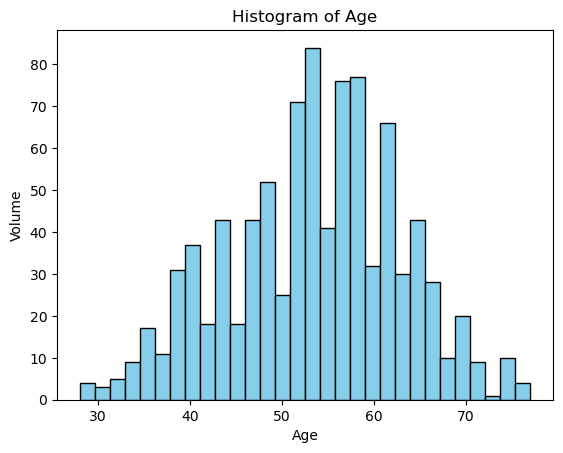

In [7]:
import matplotlib.pyplot as plt

# Plot histogram of a specific column (e.g., 'column_name')
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Volume')
plt.show()

There are 918 observations in total, with ages ranging from the late 20s to over 70. The histogram is positively skewed (skewed to the right), indicating that most individuals are on the younger side, with fewer older individuals stretching the tail. The majority of observations fall between ages 50 and early 60s, suggesting that most individuals in the dataset are middle-aged. The mean age is 53.51 years.

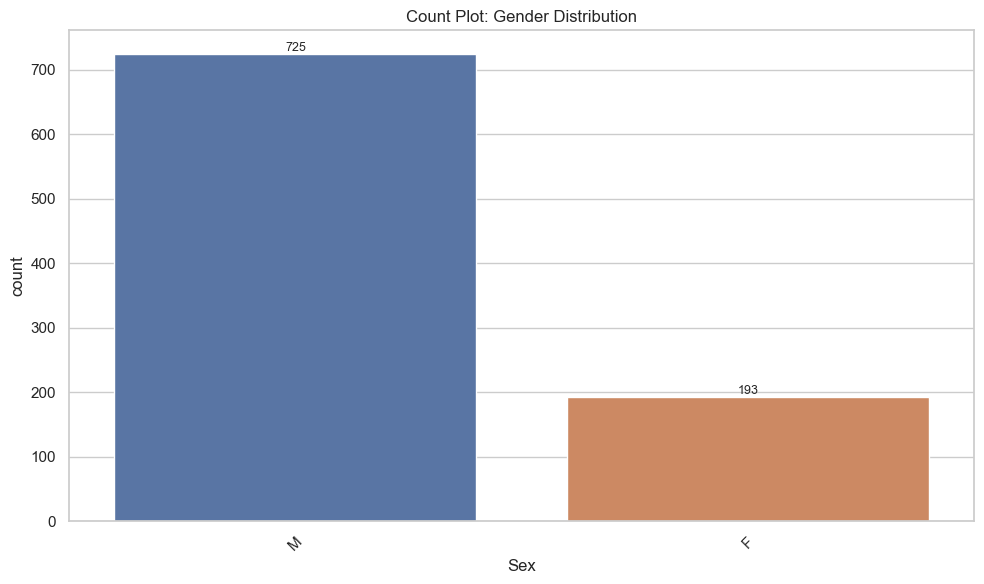

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Count plot for 'Age' (or any categorical column)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Sex')  # replace 'Age' with your column name

# Add counts on top of the bars
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.title('Count Plot: Gender Distribution')
plt.xticks(rotation=45)  # rotate x-labels if needed
plt.tight_layout()
plt.show()


- 0 = Famale
- 1 = Male

- According to the count plot of gender, out of 918 total observations, 193 are female (coded as 0) and 725 are male (coded as 1). This indicates that the dataset is heavily male-dominated.

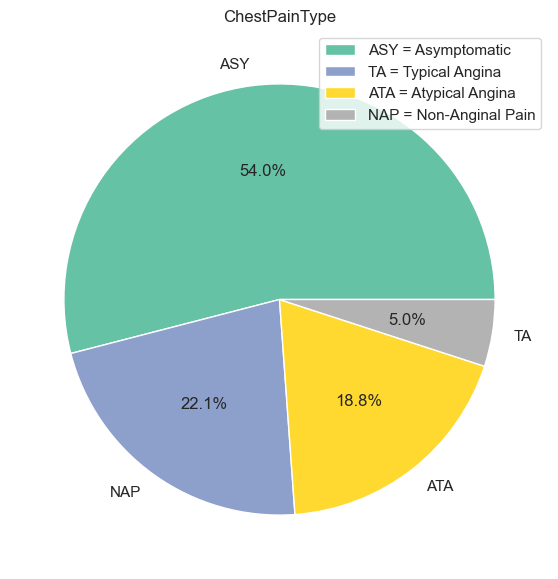

In [9]:
import matplotlib.pyplot as plt

# Sample data: ChestPainType counts
gender_counts = df['ChestPainType'].value_counts()

# Plot pie chart
ax = gender_counts.plot.pie(autopct='%1.1f%%', figsize=(7, 7), cmap='Set2')

# Title and labels
plt.title('ChestPainType')
plt.ylabel('')  # Hide the y-axis label

# Add a legend with descriptions
legend_labels = [ 'ASY = Asymptomatic',
                 'TA = Typical Angina',
                 'ATA = Atypical Angina',
                 'NAP = Non-Anginal Pain']  
plt.legend(legend_labels, loc='upper right')

plt.show()

Chest pain type:
- ASY or Asymptomatic : The person does not experience chest pain or any symptoms typically associated with heart disease.
- TA or Typical Angina : This is the classic presentation of chest pain due to myocardial ischemia (reduced blood flow to the heart muscle).
- ATA or Atypical Angina : Chest pain or discomfort that is not classic but may still be related to heart problems.
- NAP or Non-Anginal pain : Chest pain that is not related to heart disease.


According to the pie chart, 54% of the observations are classified as asymptomatic, meaning that more than half of the individuals do not experience chest pain or any symptoms typically associated with heart disease. In contrast, 22.1% of the observations fall under Non-Anginal Pain (NAP), indicating they experienced chest pain that is not related to cardiac issues. Additionally, 18.8% of the individuals experienced Atypical Angina (ATA), which refers to chest pain that does not follow the classic pattern but may still be linked to heart disease. Finally, only 5% of the observations reported Typical Angina (TA), the classic form of exertional chest pain strongly associated with coronary artery disease.

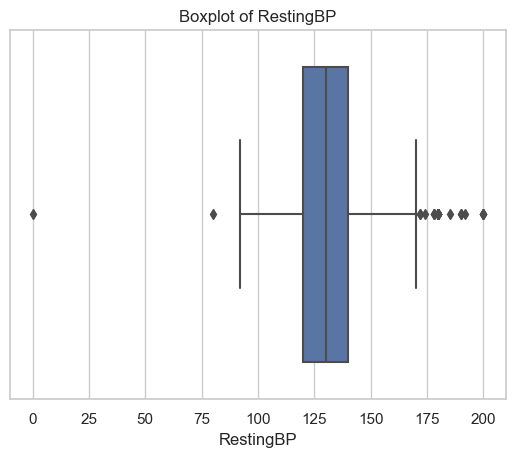

In [10]:
import seaborn as sns

# Boxplot for a specific column (e.g., 'column_name')
sns.boxplot(x=df['RestingBP'])
plt.title('Boxplot of RestingBP')
plt.show()


RestingBP refers to the resting blood pressure of an individual, measured in millimeters of mercury (mm Hg). It typically records the systolic pressure, which is the pressure in your arteries when your heart beats. Normal blood pressure should be around < 120 (mm Hg)

A high RestingBP can indicate hypertension, a major risk factor for:
- Heart attacks
- Strokes
- Kidney failure

A very low RestingBP could signal other issues like:
- Poor heart function
- Dehydration
- Endocrine disorders

According to the boxplot of RestingBP, the minimum observed resting blood pressure is 120 mm Hg, which falls within the normal range. In contrast, the maximum observed value exceeds 140 mm Hg, which is medically classified as moderate to severe hypertension—a potential indicator of serious cardiovascular risk.

The lower whisker drops below 100 mm Hg, which is considered low blood pressure and may signal poor heart function or other health concerns. Meanwhile, the upper whisker reaches nearly 175 mm Hg, which is dangerously high and certainly a cause for concern.

What stands out even more is the presence of outliers beyond the upper whisker, with the highest outlier reaching 200 mm Hg. This level of resting blood pressure is extremely high and suggests a severe risk that may require immediate medical intervention.

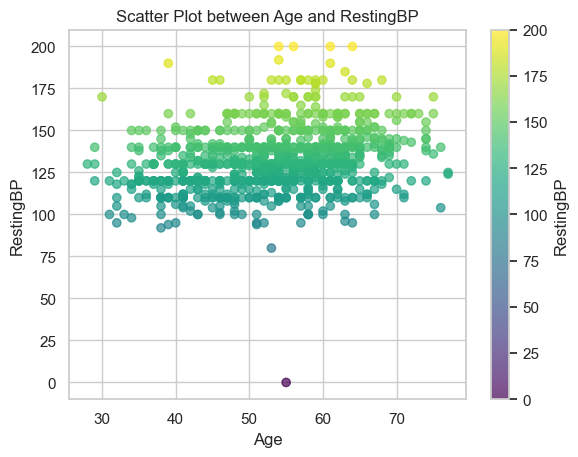

In [11]:
import matplotlib.pyplot as plt

# Scatter plot with color based on 'OXYGEN_SATURATION' (or 'AGE', whichever you prefer)
plt.scatter(df['Age'], df['RestingBP'], c=df['RestingBP'], cmap='viridis', alpha=0.7)

# Title and labels
plt.title('Scatter Plot between Age and RestingBP')
plt.xlabel('Age')
plt.ylabel('RestingBP')

# Add color bar to indicate the scale
plt.colorbar(label='RestingBP')

# Show plot
plt.show()

The scatter plot visualizing the relationship between age and resting blood pressure shows that while individuals aged 50–60 occasionally exhibit high blood pressure values nearing 200 mm Hg, there is no clear trend linking age to resting BP. Notably, individuals over 70 do not display such extreme values. This suggests that factors beyond age—such as lifestyle, underlying health conditions, or genetic predispositions—may play a more significant role in influencing resting blood pressure.

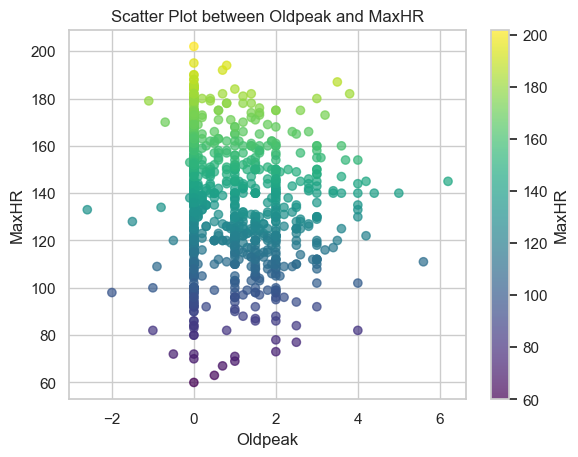

In [12]:
import matplotlib.pyplot as plt

# Scatter plot with color based on 'OXYGEN_SATURATION' (or 'AGE', whichever you prefer)
plt.scatter(df['Oldpeak'], df['MaxHR'], c=df['MaxHR'], cmap='viridis', alpha=0.7)

# Title and labels
plt.title('Scatter Plot between Oldpeak and MaxHR')
plt.xlabel('Oldpeak')
plt.ylabel('MaxHR')

# Add color bar to indicate the scale
plt.colorbar(label='MaxHR')

# Show plot
plt.show()

The scatter plot analyzing the relationship between Oldpeak (exercise-induced ST depression) and MaxHR (maximum heart rate achieved) shows no apparent correlation between the two variables. Both high and low values of Oldpeak are associated with a wide range of MaxHR values, suggesting that ST depression during exercise does not significantly influence an individual's peak heart rate.


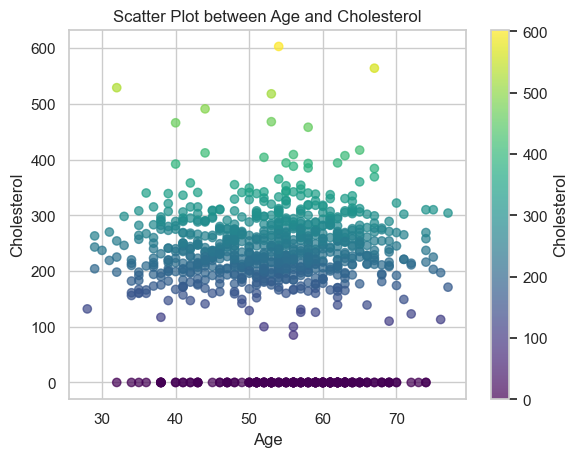

In [13]:
import matplotlib.pyplot as plt

# Scatter plot with color based on 'OXYGEN_SATURATION' (or 'AGE', whichever you prefer)
plt.scatter(df['Age'], df['Cholesterol'], c=df['Cholesterol'], cmap='viridis', alpha=0.7)

# Title and labels
plt.title('Scatter Plot between Age and Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

# Add color bar to indicate the scale
plt.colorbar(label='Cholesterol')

# Show plot
plt.show()


The scatter plot illustrating the relationship between age and cholesterol levels reveals no strong correlation between the two variables. Most individuals, regardless of age, have cholesterol levels ranging from 100 to 350 mg/dL. A few outliers exist, but they are not frequent enough to suggest age as a major influencing factor. These findings imply that cholesterol is more strongly affected by lifestyle choices, dietary habits, and genetic factors than by age alone.

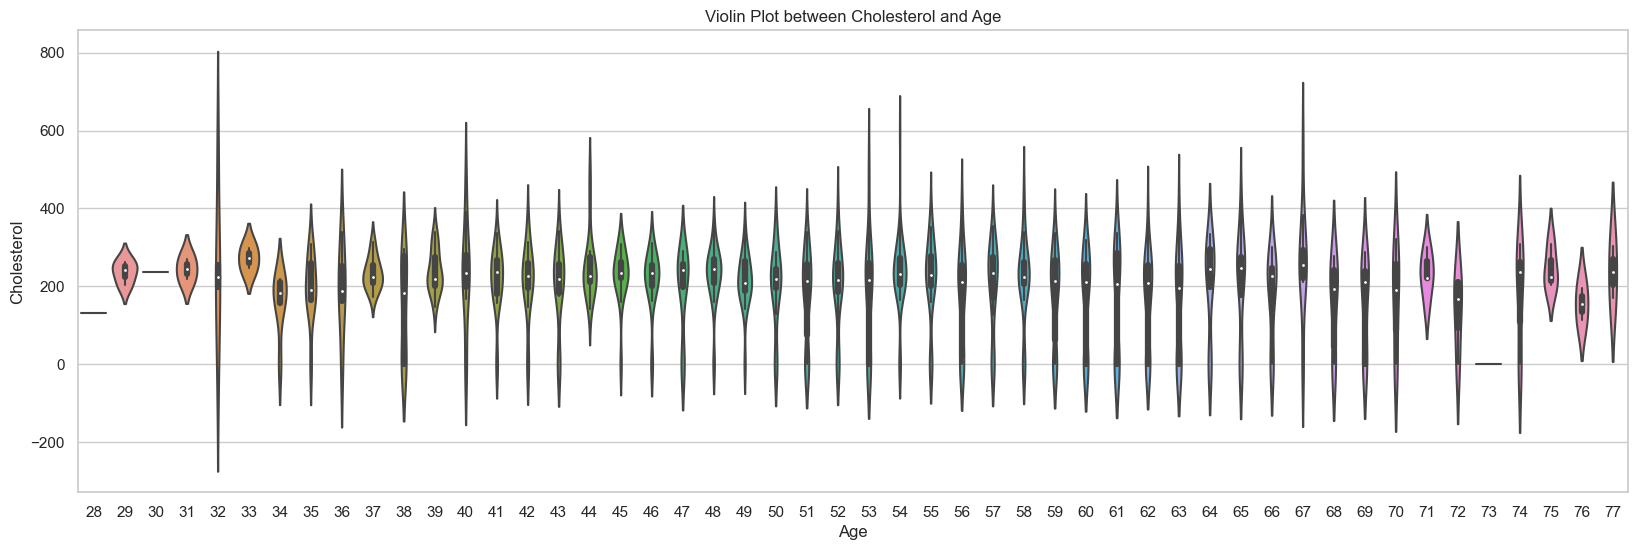

In [14]:
# Violin plot to compare the distribution of Column A across different categories in Column B
plt.figure(figsize=(20, 6)) 
sns.violinplot(x='Age', y='Cholesterol', data=df)
plt.title('Violin Plot between Cholesterol and Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

The violin plot comparing cholesterol levels across ages shows a wide distribution at nearly all age ranges, with some outliers. There is no consistent pattern indicating that age directly influences cholesterol levels. This further supports the notion that cholesterol is influenced more by individual factors—such as diet or genetics—than by age alone.

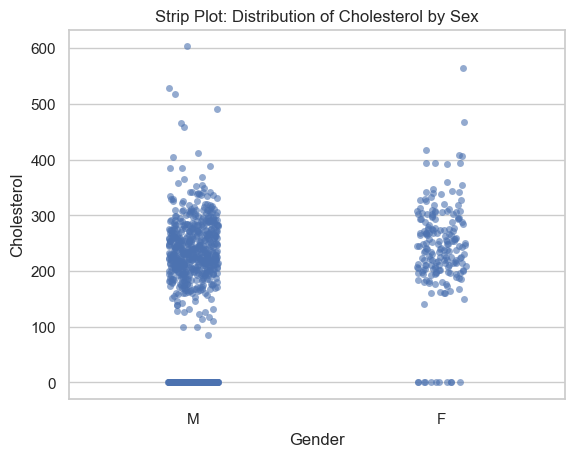

In [15]:
# Strip plot with jitter to visualize the distribution of 'column_A' by gender
sns.stripplot(x='Sex', y='Cholesterol', data=df, jitter=True, alpha=0.6)
plt.title('Strip Plot: Distribution of Cholesterol by Sex')
plt.xlabel('Gender')
plt.ylabel('Cholesterol')
plt.show()

The strip plot shows no significant difference in cholesterol levels between males and females. While the dataset is male-dominated—resulting in a denser cluster for males—the variation in cholesterol is largely individual. Extreme values (above 600 for males and over 500 for females) appear to be isolated cases, reinforcing the idea that factors like personal habits and health conditions have a greater impact on cholesterol than biological sex.


                     Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000  0.055750      -0.077150   0.254399    -0.095282   
Sex             0.055750  1.000000      -0.126559   0.005133    -0.200092   
ChestPainType  -0.077150 -0.126559       1.000000  -0.020647     0.067880   
RestingBP       0.254399  0.005133      -0.020647   1.000000     0.100893   
Cholesterol    -0.095282 -0.200092       0.067880   0.100893     1.000000   
FastingBS       0.198039  0.120076      -0.073151   0.070193    -0.260974   
RestingECG     -0.007484  0.071552      -0.072537   0.022656    -0.196544   
MaxHR          -0.382045 -0.189186       0.289123  -0.112135     0.235792   
ExerciseAngina  0.215793  0.190664      -0.354727   0.155101    -0.034166   
Oldpeak         0.258612  0.105734      -0.177377   0.164803     0.050148   
ST_Slope       -0.268264 -0.150693       0.213521  -0.075162     0.111471   
HeartDisease    0.282039  0.305445      -0.386828   0.107589    -0.232741   

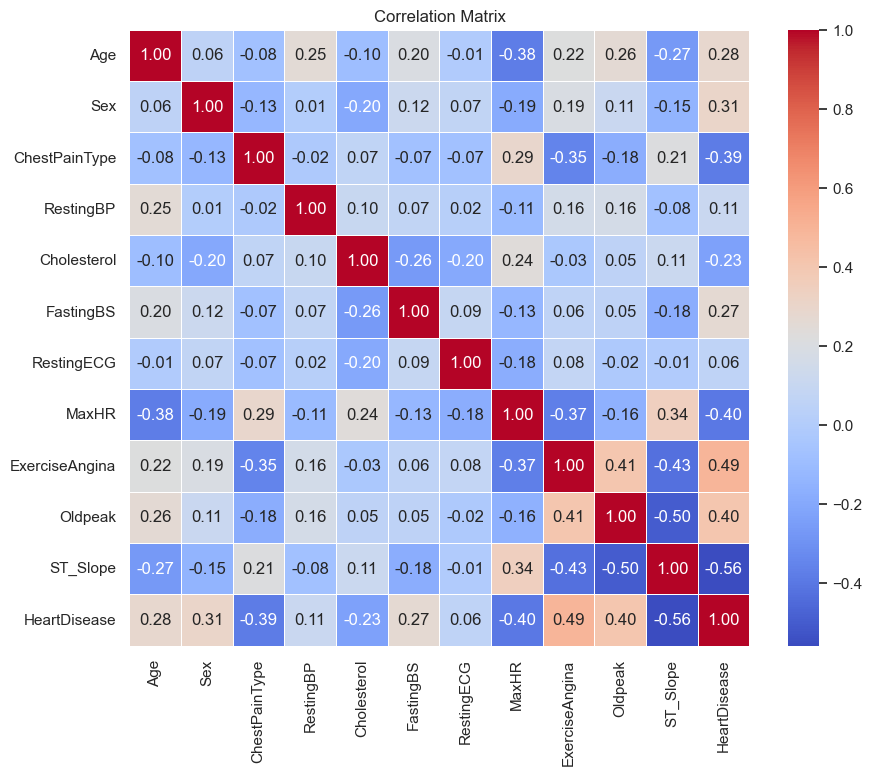

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix reveals several notable relationships. Oldpeak and ExerciseAngina show a moderate positive correlation (0.41), suggesting a link between exercise-induced angina and ST depression. Meanwhile, Oldpeak and ST_Slope exhibit a moderately strong negative correlation (-0.50), indicating that higher ST depression is generally associated with downward ST slope patterns. Additionally, ExerciseAngina has a strong positive correlation with HeartDisease (0.49), highlighting it as one of the most significant predictors of heart disease in the dataset.

In [17]:
import seaborn as sns
sns.set_style("whitegrid")

# Pair Plot

/Users/yourus_m/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


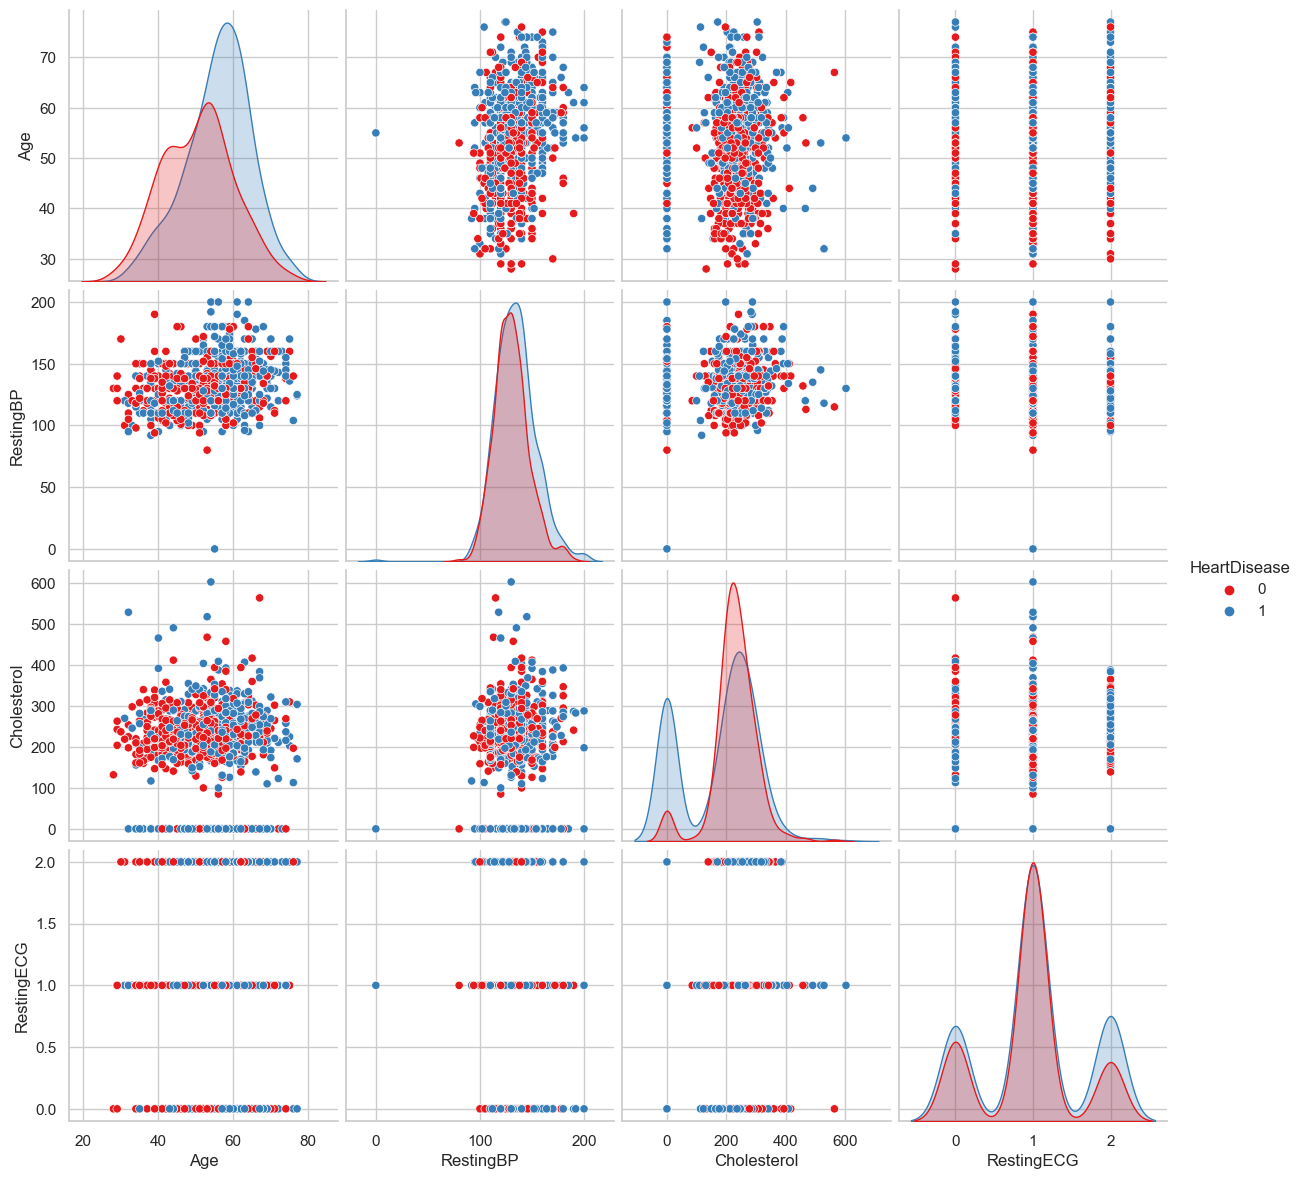

In [18]:
sns.pairplot(
    df[["Age", "RestingBP", "Cholesterol", "RestingECG", "HeartDisease"]],
    hue = "HeartDisease",
    height = 3,
    palette = "Set1")

According to the pair plot of age, we could see that at the age of 70, there's a high chance people that age might experience a heart disease despite the fact that most of the time, age is not the factor that would most likely influence a heart disease. That is why we need to further analyse the data and each variables, because when one ages, their body goes through changes, which might be one of the cause that could lead one to experiencing a heart disease. It is likely not about age itself but the other factors that changes through AGE. 



In [19]:
df_dummies = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease'], drop_first=True)
print(df_dummies.head())

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_1  \
0   40        140          289          0    172      0.0   True   
1   49        160          180          0    156      1.0  False   
2   37        130          283          0     98      0.0   True   
3   48        138          214          0    108      1.5  False   
4   54        150          195          0    122      0.0   True   

   ChestPainType_1  ChestPainType_2  ChestPainType_3  RestingECG_1  \
0             True            False            False          True   
1            False             True            False          True   
2             True            False            False         False   
3            False            False            False          True   
4            False             True            False          True   

   RestingECG_2  ExerciseAngina_1  ST_Slope_1  ST_Slope_2  HeartDisease_1  
0         False             False       False        True           False  
1         False   

In [20]:
df_dummies.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_1', 'ChestPainType_1', 'ChestPainType_2', 'ChestPainType_3',
       'RestingECG_1', 'RestingECG_2', 'ExerciseAngina_1', 'ST_Slope_1',
       'ST_Slope_2', 'HeartDisease_1'],
      dtype='object')

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
# Replace 'target_column' with the actual name of your target column
X = df.drop(columns= ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope'])  # Features (all columns except the target)
y = df['HeartDisease']  # Target variable (the column you want to predict)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 734 samples
Test set size: 184 samples


The dataset is split into training and test sets using an 80-20 ratio. This ensures the model can be trained on the majority of the data while reserving a separate subset for evaluating generalization performance. The random state of 42 ensures reproducibility of the results.

In this step, we split the dataset into the training set and the test set in order to prepare the data for the model builing process. In which, training set insists of 734 samples and Test set consists of 184 samples (20% of the overall observations) --  at the random state of 42. We determined x to be: Age, RestingBp, Cholesterol, FastingBS, MaxHR, Oldpeak, Sex, Chestpaintype, RestingECG, ExerciseAngina, and ST_Slope, all while we determined y to be Heartdisease. 

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-06-26 16:42:14.730794: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Neural Network model
model = Sequential()

# Add an input layer and first hidden layer with 12 neurons and ReLU activation
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))

# Add a second hidden layer with 8 neurons and ReLU activation
model.add(Dense(8, activation='relu'))

# Add an output layer with 1 neuron (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Make predictions
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

Epoch 1/50
74/74 [==============================] - 1s 5ms/step - loss: 0.6292 - accuracy: 0.7807 - val_loss: 0.5377 - val_accuracy: 1.0000
Epoch 2/50
74/74 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 1.0000 - val_loss: 0.3912 - val_accuracy: 1.0000
Epoch 3/50
74/74 [==============================] - 0s 3ms/step - loss: 0.3113 - accuracy: 1.0000 - val_loss: 0.2441 - val_accuracy: 1.0000
Epoch 4/50
74/74 [==============================] - 0s 3ms/step - loss: 0.1840 - accuracy: 1.0000 - val_loss: 0.1397 - val_accuracy: 1.0000
Epoch 5/50
74/74 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 1.0000 - val_loss: 0.0797 - val_accuracy: 1.0000
Epoch 6/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 1.0000 - val_loss: 0.0479 - val_accuracy: 1.0000
Epoch 7/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 8/50
74/74 [==

In this step, we have finally reached the model training process whith the epoch of 50 rounds and the batch size of 10.

A simple feedforward neural network was built using Keras. The architecture includes:

- An input layer matching the number of features
- Two hidden layers with 12 and 8 neurons respectively, both using ReLU activation
- An output layer with a single neuron and sigmoid activation for binary classification

    The model was compiled with the Adam optimizer and binary crossentropy loss function, then trained for 50 epochs with a batch size of 10.

    Training and validation accuracy reached 100%, which could suggest either excellent performance or potential overfitting, depending on data complexity and regularization.

### Model Evaluation result

The model achieved perfect accuracy on the test set, with no misclassifications:

- Confusion Matrix: True Positives = 107, True Negatives = 77, False Positives = 0, False Negatives = 0

- Classification Report:
  - Precision, Recall, and F1-score for both classes = 1.00

While these results appear excellent, it’s important to be cautious. Such perfect accuracy is uncommon in real-world data and may indicate a lack of noise or data leakage. Further validation using techniques like cross-validation or testing on an external dataset is recommended.

# Check for imbalance

In [24]:
import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)


scikit-learn version: 1.3.2
imbalanced-learn version: 0.11.0


In [25]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Before SMOTE
print("Before:", Counter(y))

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# After SMOTE
print("After:", Counter(y_resampled))



Before: Counter({1: 508, 0: 410})
After: Counter({0: 508, 1: 508})


In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [27]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       107

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



As a comparison, a logistic regression model was trained using the same features. It also achieved perfect performance on the test set. This consistency across models could further indicate the dataset may be particularly clean or separable, or that some form of data leakage occurred during preprocessing.

#  Polynomial Features and Interaction Terms

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample data
np.random.seed(0)
X = pd.DataFrame({
    'x1': np.random.rand(100),
    'x2': np.random.rand(100)
})
# Binary target
y = (X['x1'] + X['x2'] + 0.1 * np.random.randn(100) > 1).astype(int)

# 1. Create polynomial features (degree=2 includes squares and interactions)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Get feature names for interpretation
feature_names = poly.get_feature_names_out(input_features=['x1', 'x2'])
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.2, random_state=42)

# 3. Fit logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Optional: view coefficients
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_[0]
})
print(coeff_df)


Accuracy: 0.95
  Feature  Coefficient
0      x1     1.766385
1      x2     1.897185
2    x1^2     1.665919
3   x1 x2     1.693443
4    x2^2     1.918604


This section demonstrates the creation and use of polynomial features to capture non-linear relationships in the data. Using a synthetic dataset with two variables (x1 and x2), we apply second-degree polynomial transformation, which includes squared terms and interaction terms (e.g., x1^2, x1*x2, x2^2).
A logistic regression model is then trained on the expanded feature set. The resulting model achieves an accuracy of 95%, indicating that adding polynomial terms can significantly improve model performance when the underlying data relationships are non-linear.
This technique could also be applied to the heart disease dataset to explore whether interaction terms or non-linearities between clinical features (e.g., MaxHR × Age, Cholesterol²) improve predictive accuracy.

In [29]:
import pandas as pd

X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
print(X_poly_df.head())



         x1        x2      x1^2     x1 x2      x2^2
0  0.548814  0.677817  0.301196  0.371995  0.459435
1  0.715189  0.270008  0.511496  0.193107  0.072904
2  0.602763  0.735194  0.363324  0.443148  0.540510
3  0.544883  0.962189  0.296898  0.524280  0.925807
4  0.423655  0.248753  0.179483  0.105385  0.061878


The transformed dataset after applying polynomial features includes five columns: x1, x2, x1², x1×x2, and x2². This output allows us to confirm the structure of the expanded feature set. Visualizing and understanding these features is important when interpreting model coefficients and determining which combinations contribute most to the prediction.


# Cross Validation

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Create model
model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print accuracy for each fold and mean accuracy
print("Cross-validation scores for each fold:", scores)
print("Average accuracy:", np.mean(scores))


Cross-validation scores for each fold: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Average accuracy: 0.9666666666666668


In this step, 5-fold cross-validation is performed on the Iris dataset using a Random Forest Classifier. Cross-validation is a reliable technique for evaluating model performance by partitioning the data into five subsets, training on four, and validating on the fifth in rotation. This helps prevent overfitting and provides a more generalized accuracy estimate.
The individual fold accuracies ranged from 93.3% to 100%, with an average accuracy of 96.67%. This high average accuracy suggests that the Random Forest model performs well on the Iris dataset and is consistent across different subsets of the data.
While this example uses the Iris dataset for demonstration, a similar cross-validation process could be applied to the heart disease dataset to assess model stability and reliability across different patient subsets.

# GridSearchCV

In [31]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Define the model
model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

# Set up GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X, y)

# Print best parameters and best accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)


Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
Best cross-validated accuracy: 0.9666666666666668


This section performs hyperparameter tuning using GridSearchCV with a Random Forest classifier. A grid of parameters—including n_estimators, max_depth, and min_samples_split—is defined, and the model is evaluated using 5-fold cross-validation for each parameter combination.

The grid search identified the best parameters as:
- n_estimators: 10
- max_depth: None (unlimited depth)
- min_samples_split: 2

The best cross-validated accuracy achieved was 96.67%, consistent with previous results. This approach is essential for optimizing model performance and avoiding underfitting or overfitting. Similar tuning can be applied to models trained on the heart disease dataset for optimal predictive performance.

In [33]:
import joblib
joblib.dump(model, 'heart_attack_model.pkl')


['heart_attack_model.pkl']

Overall, both the neural network and logistic regression models performed extremely well on the given dataset. While this is promising, additional evaluation (such as cross-validation or external validation) should be conducted before deployment. Incorporating techniques like dropout, regularization, or testing robustness with noisy data could help assess the model's true generalizability.